# Hands-on altimetry tutorial
## 3. Calculation of derived variables

### Laura Gómez Navarro
IMEDEA (UIB-CSIC) and Utrecht University

email: laura.gomez@uib.es

### Paul Hargous
IMEDEA (UIB-CSIC)

email: hargous@imedea.uib-csic.es


# Index

1. Theory
2. Visualization of the different variables
3. Calculation and visualization of the derived variables


# 1. Theory:

Reminder: Absolute Dynamic Topography (ADT) can be calculated as:

$ ADT = SLA + MDT$

## Geostrophic velocities:
        
* Zonal component of the geostrophic velocity, $u_g$:
### $u_g = -\frac{g}{f} \frac{\partial SSH}{\partial y}$
* Meridional component of the geostrophic velocity, $v_g$:
### $v_g = \frac{g}{f} \frac{\partial SSH}{\partial x}$

### $f = 2 \Omega \sin(Lat)$ , \Omega = Earth rotation

* Absolute geostrophic velocity, $U$
### $U = \sqrt{{u_g}^2+{v_g}^2}$
        

## Kinetic Energy:

Given that $u_g$ y $v_g$ are the zonal and meridional components, respectively, of the geostrophic velocities, we define it as:
<br>
<br>
$u_g = u' + \overline{u}$
<br>
$v_g = v' + \overline{v}$
<br>
<br>
; where:
<br>
<br>
$\overline{u}$, $\overline{v}$  ; represents the temporal mean --> $\overline{u}(y,x)$, $\overline{v}(y,x)$
<br>
<br>
$u', v'$; represents the velocity anomaly in time --> u'(t,y,x)   v'(t,y,x)
<br>
<br>
We can then define:

* Total Kinetic Energy, TKE:
### $TKE(t,y,x) =  \frac12$ $({u_g}^2 + {v_g}^2)$
<br>
<br>

* Mean Kinetic Energy, MKE:
### $ MKE(y,x) =  \frac12 (\overline{u}^2 + \overline{v}^2)$
<br>
<br>

* Eddy Kinetic Energy, EKE:
### $EKE(t,y,x) = \frac12$ $({u'}^2 + {v'}^2)$
<br>
<br>
If we take the temporal mean, we can define the different kinetic variables, one in function of the other:

### $\overline{TKE} = MKE + \overline{EKE}$



## Relative vorticity, $\zeta_z$:

### $\zeta_z = \frac{\partial v_g}{\partial x} - \frac{\partial u_g}{\partial y}$ = $\frac{g}{f}\nabla ^2 SSH - \frac{g\beta}{f^2} \frac{\partial SSH}{\partial y}$
, where:
### $\beta = \frac{\partial f}{\partial y}$    


## Rossby number, Ro:
### $ Ro = \frac{U}{fL} $ = $\frac{\zeta_z}{f}$
<br>
Ro O(1) => submesoscale dynamics (1-10 km)
<br>
Ro << 1 => mesoscale dynamics (10-100 km)
<br>
(Thomas et al., 2008)
<br><br>


# Vamos a usar los datos L4 para simplificar los cálculos:

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import datetime
import json
from glob import glob
import matplotlib.gridspec as gridspec


# 1) Reading the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We define the file direcory where we have the data stored:
filedir = '../content/drive/MyDrive/Altimetry/L4/'

In [ ]:
# We obtain the list of files:
## DT (processed data):
nfiles_L4_dt = sorted(glob(filedir + 'dt_europe_allsat_phy_l4_*.nc'))

In [ ]:
# We can also read all the daily data files at once using the open_mfdataset function (mf = multiple files):
ds_all = xr.open_mfdataset(nfiles_L4_dt)

In [ ]:
ds_all

<xarray.Dataset> Size: 2GB
Dimensions:         (time: 89, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * time            (time) datetime64[ns] 712B 2023-02-01 ... 2023-04-30
  * latitude        (latitude) float32 1kB 19.94 20.06 20.19 ... 65.94 66.06
  * longitude       (longitude) float32 2kB -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 8B 0 1
Data variables: (12/14)
    crs             (time) int32 356B -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 263kB dask.array<chunksize=(1, 50, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 412kB dask.array<chunksize=(1, 50, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    tpa_correction  (time) float64 712B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-02-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-01-31T12:00:00Z
    title:                           DT merged all satellites European Seas G...

In [ ]:
min_lon = -2.
max_lon = 10.
min_lat = 36.
max_lat = 44.

zona_coords = [min_lon, max_lon, min_lat, max_lat]

In [ ]:
ds_sub = ds_all.where((ds_all['longitude'] < zona_coords[1]) & (ds_all['longitude'] > zona_coords[0]) &
                              (ds_all['latitude'] < zona_coords[3]) & (ds_all['latitude'] > zona_coords[2]), drop=True)


In [ ]:
ds = ds_sub.isel(time=0)
ds

<xarray.Dataset> Size: 689kB
Dimensions:         (longitude: 96, latitude: 64, nv: 2)
Coordinates:
    time            datetime64[ns] 8B 2023-02-01
  * latitude        (latitude) float32 256B 36.06 36.19 36.31 ... 43.81 43.94
  * longitude       (longitude) float32 384B -1.938 -1.812 ... 9.812 9.938
  * nv              (nv) int32 8B 0 1
Data variables: (12/14)
    crs             (longitude, latitude) float64 49kB -2.147e+09 ... -2.147e+09
    lat_bnds        (latitude, nv, longitude) float32 49kB dask.array<chunksize=(46, 2, 96), meta=np.ndarray>
    lon_bnds        (longitude, nv, latitude) float32 49kB dask.array<chunksize=(48, 2, 64), meta=np.ndarray>
    sla             (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    err_sla         (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    ugosa           (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    ...              ...
    err_vgosa       (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    adt             (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    ugos            (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    vgos            (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
    tpa_correction  (longitude, latitude) float64 49kB dask.array<chunksize=(96, 64), meta=np.ndarray>
    flag_ice        (latitude, longitude) float64 49kB dask.array<chunksize=(46, 48), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-02-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-01-31T12:00:00Z
    title:                           DT merged all satellites European Seas G...

# 2) Visualization of the different variables

ADT:

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


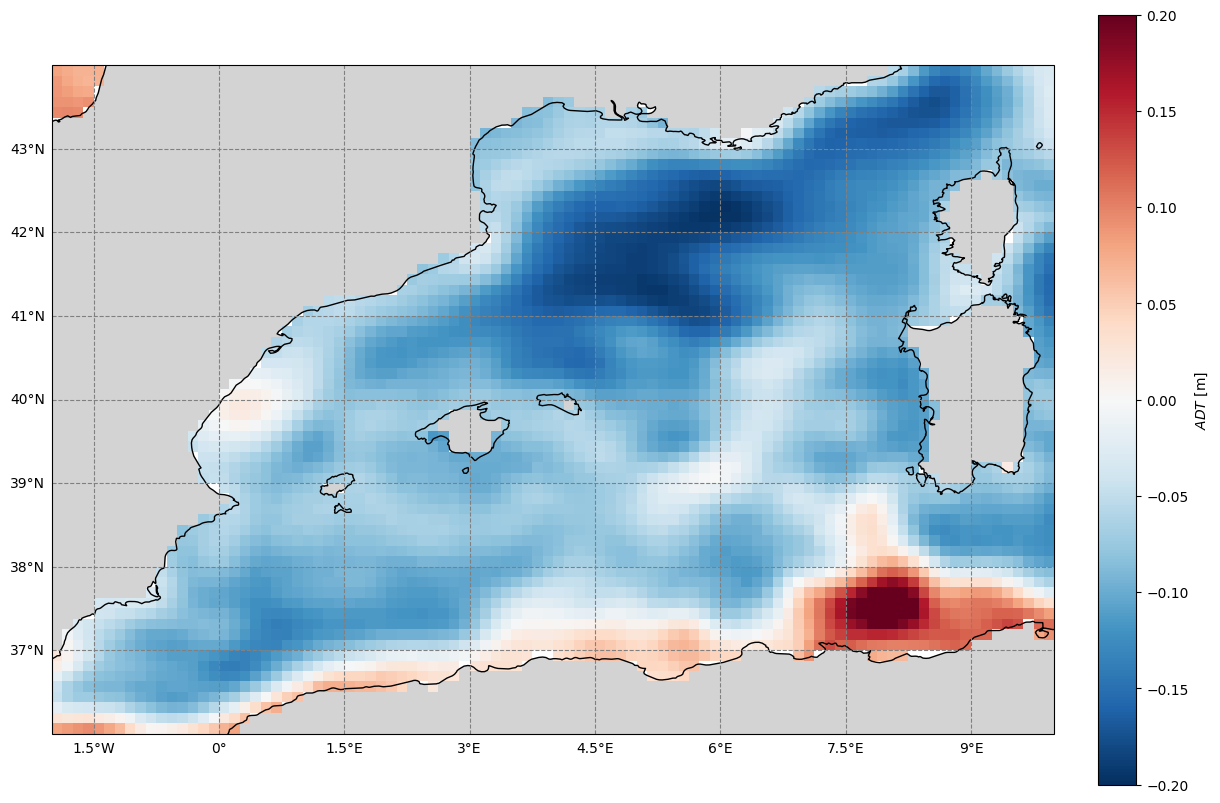

In [ ]:
plt.figure(figsize=(14,10))
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, ds.adt, vmin=-0.2, vmax=0.2, cmap='RdBu_r', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cc, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('$ADT$ [m]')

plt.show()

Velocities:

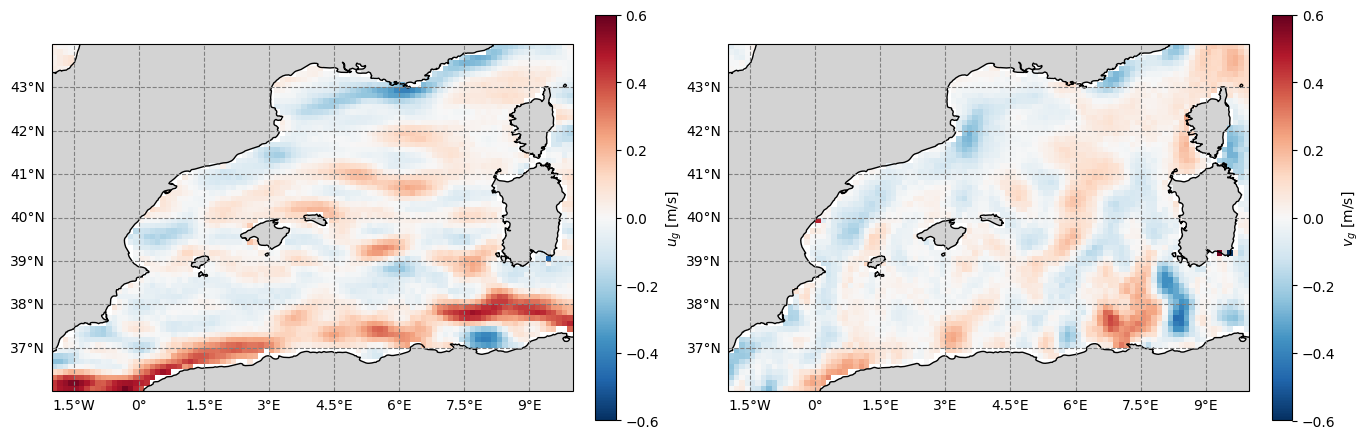

In [ ]:
plt.figure(figsize=(16,10))
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, ds.ugos, vmin=-0.6, vmax=0.6, cmap='RdBu_r', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cc, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('$u_g$ [m/s]')

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())

ax2.coastlines()
ax2.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax2.pcolormesh(ds.longitude, ds.latitude, ds.vgos, vmin=-0.6, vmax=0.6, cmap='RdBu_r', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cc, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('$v_g$ [m/s]')
# plt.title('L4 DT')
plt.show()

# 3) Calculation and visualization of the derived variables

In [ ]:
# We define parameters:
g = 9.81  # gravitational acceleration in m/s^2
omega = 7.2921e-5  # Earth rotation in rad/s

# Coriolis parameter
f = 10**(-4) # Approximate value

In [ ]:
dd = 13875.


# KE:

In [ ]:
KE = 0.5 * (ds_sub.ugos**2 + ds_sub.vgos**2)

In [ ]:
MKE = np.nanmean(KE, axis=0)

<ipython-input-21-06e558b290a5>:1: RuntimeWarning: Mean of empty slice
  MKE = np.nanmean(KE, axis=0);


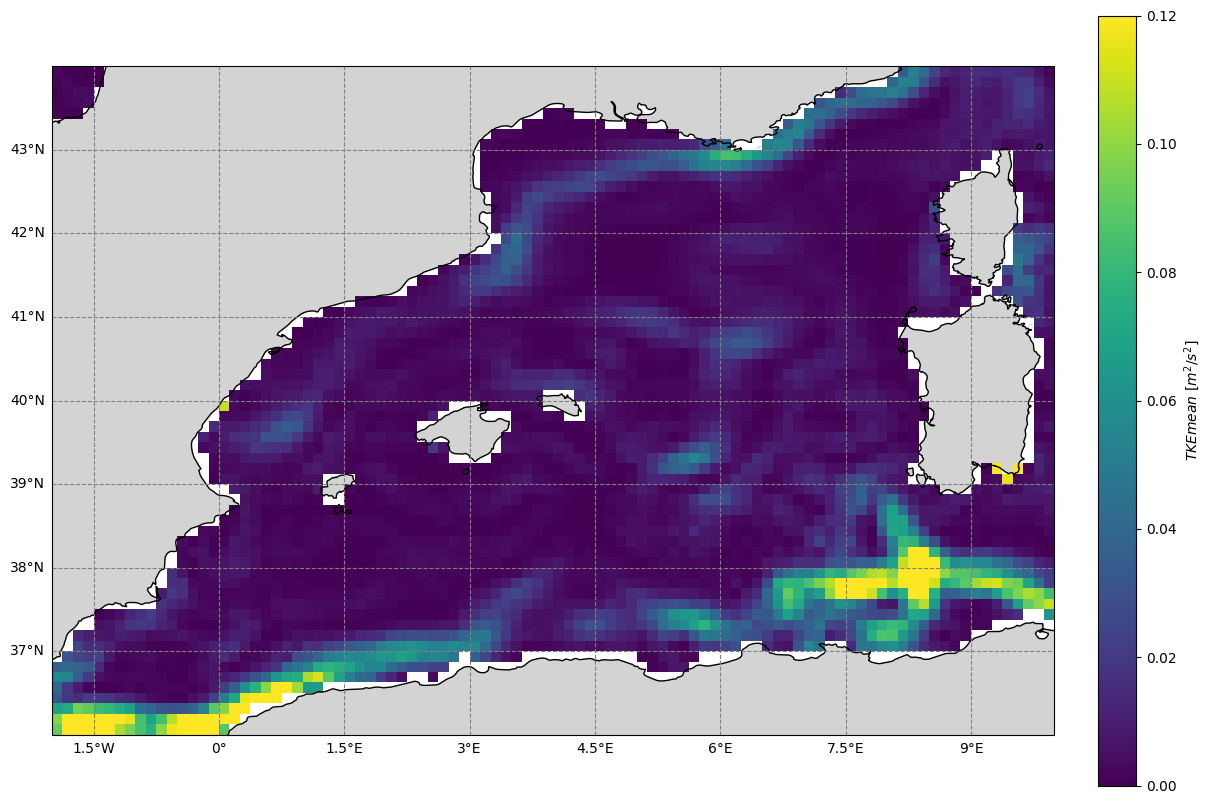

In [ ]:
plt.figure(figsize=(14,10))
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, KE[0,:,:], vmin=0., vmax=0.12, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(cc, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('$TKE mean$ [$m^2 / s^2$]')

plt.show()

In [ ]:
EKE = 0.5 * (ds_sub.ugosa**2 + ds_sub.vgosa**2)

In [ ]:
# less data at the coast as we are calcualting the derivatives

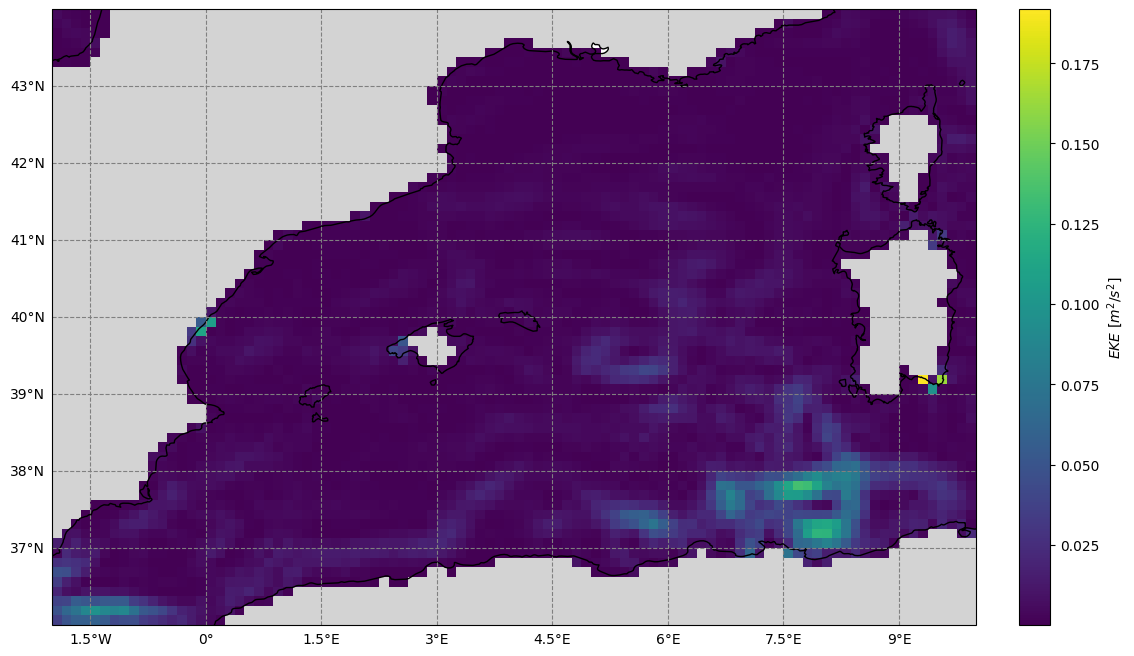

In [ ]:
plt.figure(figsize=(14,8))
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, EKE[0,:,:], cmap='viridis', transform=ccrs.PlateCarree()) #, vmin=0., vmax=0.12
cbar = plt.colorbar(cc, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('$EKE$ [$m^2 / s^2$]')

plt.show()

# Extra:

## Relative vorticity:

In [ ]:
du_gx, du_gy = np.gradient(ds.ugos.values, dd, dd)
dv_gx, dv_gy = np.gradient(ds.vgos.values, dd, dd)

rel_vort = dv_gx - du_gy

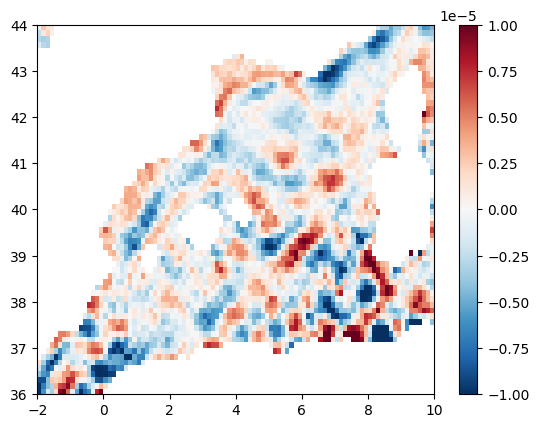

In [ ]:
plt.pcolormesh(ds.longitude, ds.latitude, rel_vort, vmin=-1.e-5, vmax=1.e-5, cmap='RdBu_r')
plt.colorbar()
plt.show()

## Rossby:

In [ ]:
rossby = rel_vort / f

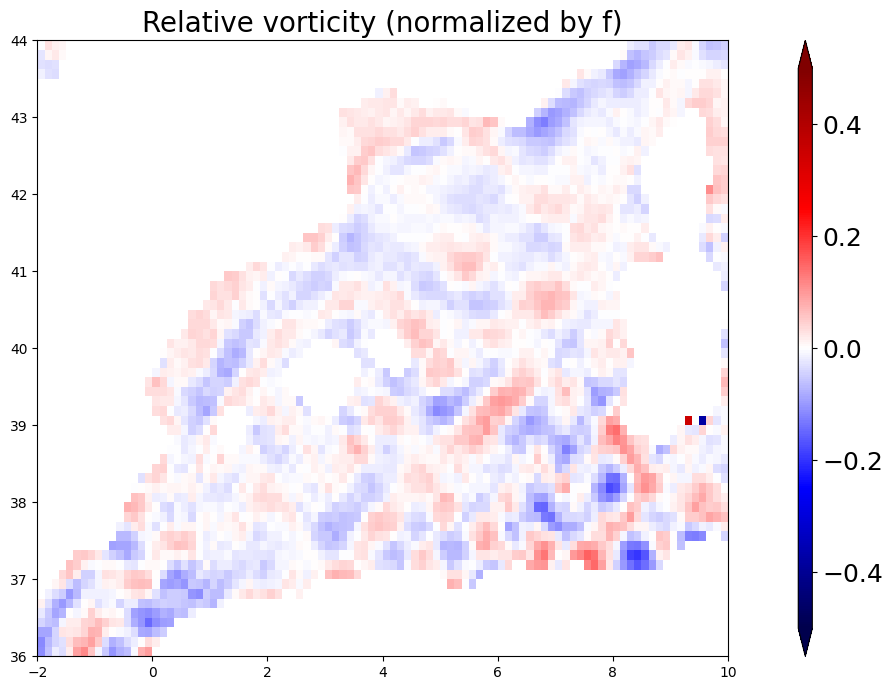

In [ ]:
plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(1, 2, width_ratios=[.98, .02])

ax_r = plt.subplot(gs[0])
axC3 = plt.subplot(gs[1])

pp3 = ax_r.pcolormesh(ds.longitude, ds.latitude, rossby, vmin=-.5, vmax=.5, cmap='seismic')

cbar3 = plt.colorbar(pp3, cax=axC3, extend='both')
cbar3.ax.tick_params(labelsize=18)

ax_r.set_title('Relative vorticity (normalized by f)', size=20)

plt.show()